## Covid19 India: Predictive Modeling

**To-Do:** General information on project, including information, material pertaining to subject matter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os

## 1. Data Preparation and Feature Engineering

In [2]:
# Load the data
data = pd.read_csv('../Data/covid19indiaorg/states.csv')
data.head(10)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
6,2020-02-14,Kerala,3,3,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
8,2020-02-20,Kerala,3,3,0,0,NaN
9,2020-02-20,Punjab,0,0,0,0,3675493.0


In [3]:
data.tail()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
10450,2020-12-31,Tripura,33261,32728,382,23,578723.0
10451,2020-12-31,India,10286310,9881732,149018,2861,173111994.0
10452,2020-12-31,Uttar Pradesh,584966,562459,8352,0,23943169.0
10453,2020-12-31,Uttarakhand,90920,83506,1509,1186,1777371.0
10454,2020-12-31,West Bengal,552063,530366,9712,0,7110430.0


In [4]:
# Extract India data
ind_df = data[data['State'] == 'India']
ind_df

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
1,2020-01-30,India,1,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
10,2020-02-20,India,3,3,0,0,NaN
...,...,...,...,...,...,...,...
10307,2020-12-27,India,10208725,9781945,147940,2812,168818354.0
10343,2020-12-28,India,10224797,9806767,148190,2825,169802049.0
10379,2020-12-29,India,10245339,9833356,148475,2837,170922330.0
10415,2020-12-30,India,10267284,9859763,148774,2852,172049574.0


In [5]:
ind_df.shape

(310, 7)

In [6]:
# Rename columns
ind_df.columns = ['Date', 'Region', 'Total Confirmed', 'Total Recovered', 'Total Deceased', 'Other', 'Total Tested']
ind_df

,Date,Region,Total Confirmed,Total Recovered,Total Deceased,Other,Total Tested
1,2020-01-30,India,1,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
10,2020-02-20,India,3,3,0,0,NaN
...,...,...,...,...,...,...,...
10307,2020-12-27,India,10208725,9781945,147940,2812,168818354.0
10343,2020-12-28,India,10224797,9806767,148190,2825,169802049.0
10379,2020-12-29,India,10245339,9833356,148475,2837,170922330.0
10415,2020-12-30,India,10267284,9859763,148774,2852,172049574.0


In [7]:
# Basic info
ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1 to 10451
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             310 non-null    object 
 1   Region           310 non-null    object 
 2   Total Confirmed  310 non-null    int64  
 3   Total Recovered  310 non-null    int64  
 4   Total Deceased   310 non-null    int64  
 5   Other            310 non-null    int64  
 6   Total Tested     294 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 19.4+ KB


**Feature 1: Create a new column for Active Cases**

Formula: active = total_confirmed - (total_recovered + other + total_deceased)

In [8]:
ind_df['Active'] = ind_df['Total Confirmed'] - (ind_df['Total Recovered'] + ind_df['Other'] + ind_df['Total Deceased'])
ind_df['Active']

1             1
3             2
5             3
7             0
10            0
          ...  
10307    276028
10343    267015
10379    260671
10415    255895
10451    252699
Name: Active, Length: 310, dtype: int64

In [9]:
# Delete the 'other' column
ind_df = ind_df.drop(['Other'], axis = 1)
ind_df

,Date,Region,Total Confirmed,Total Recovered,Total Deceased,Total Tested,Active
1,2020-01-30,India,1,0,0,NaN,1
3,2020-02-02,India,2,0,0,NaN,2
5,2020-02-03,India,3,0,0,NaN,3
7,2020-02-14,India,3,3,0,NaN,0
10,2020-02-20,India,3,3,0,NaN,0
...,...,...,...,...,...,...,...
10307,2020-12-27,India,10208725,9781945,147940,168818354.0,276028
10343,2020-12-28,India,10224797,9806767,148190,169802049.0,267015
10379,2020-12-29,India,10245339,9833356,148475,170922330.0,260671
10415,2020-12-30,India,10267284,9859763,148774,172049574.0,255895


**Feature 2: Create new columns for daily_confirmed, daily_recovered and daily_deceased cases**

Initialize the new columns to 0

In [10]:
ind_df['Daily Confirmed'] = 0
ind_df['Daily Recovered'] = 0
ind_df['Daily Deceased'] = 0

Compute the values for daily_confirmed (subtract total_confirmed value of a row from the value of the previous row)

In [11]:
ind_df['Daily Confirmed'] = ind_df['Total Confirmed'] - ind_df['Total Confirmed'].shift(1)
ind_df['Daily Confirmed']

1            NaN
3            1.0
5            1.0
7            0.0
10           0.0
          ...   
10307    20333.0
10343    16072.0
10379    20542.0
10415    21945.0
10451    19026.0
Name: Daily Confirmed, Length: 310, dtype: float64

Compute the values for daily_recovered (subtract total_recovered value of a row from the previous row value)

In [12]:
ind_df['Daily Recovered'] = ind_df['Total Recovered'] - ind_df['Total Recovered'].shift(1)
ind_df['Daily Recovered']

1            NaN
3            0.0
5            0.0
7            3.0
10           0.0
          ...   
10307    21097.0
10343    24822.0
10379    26589.0
10415    26407.0
10451    21969.0
Name: Daily Recovered, Length: 310, dtype: float64

Compute the values for daily_deceased (subtract total_deceased value of a row from the previous row value)

In [13]:
ind_df['Daily Deceased'] = ind_df['Total Deceased'] - ind_df['Total Deceased'].shift(1)
ind_df['Daily Deceased']

1          NaN
3          0.0
5          0.0
7          0.0
10         0.0
         ...  
10307    281.0
10343    250.0
10379    285.0
10415    299.0
10451    244.0
Name: Daily Deceased, Length: 310, dtype: float64

In [14]:
# check null values
ind_df.isnull().sum()

Date                0
Region              0
Total Confirmed     0
Total Recovered     0
Total Deceased      0
Total Tested       16
Active              0
Daily Confirmed     1
Daily Recovered     1
Daily Deceased      1
dtype: int64

In [15]:
# Drop all null values
ind_df = ind_df.dropna()

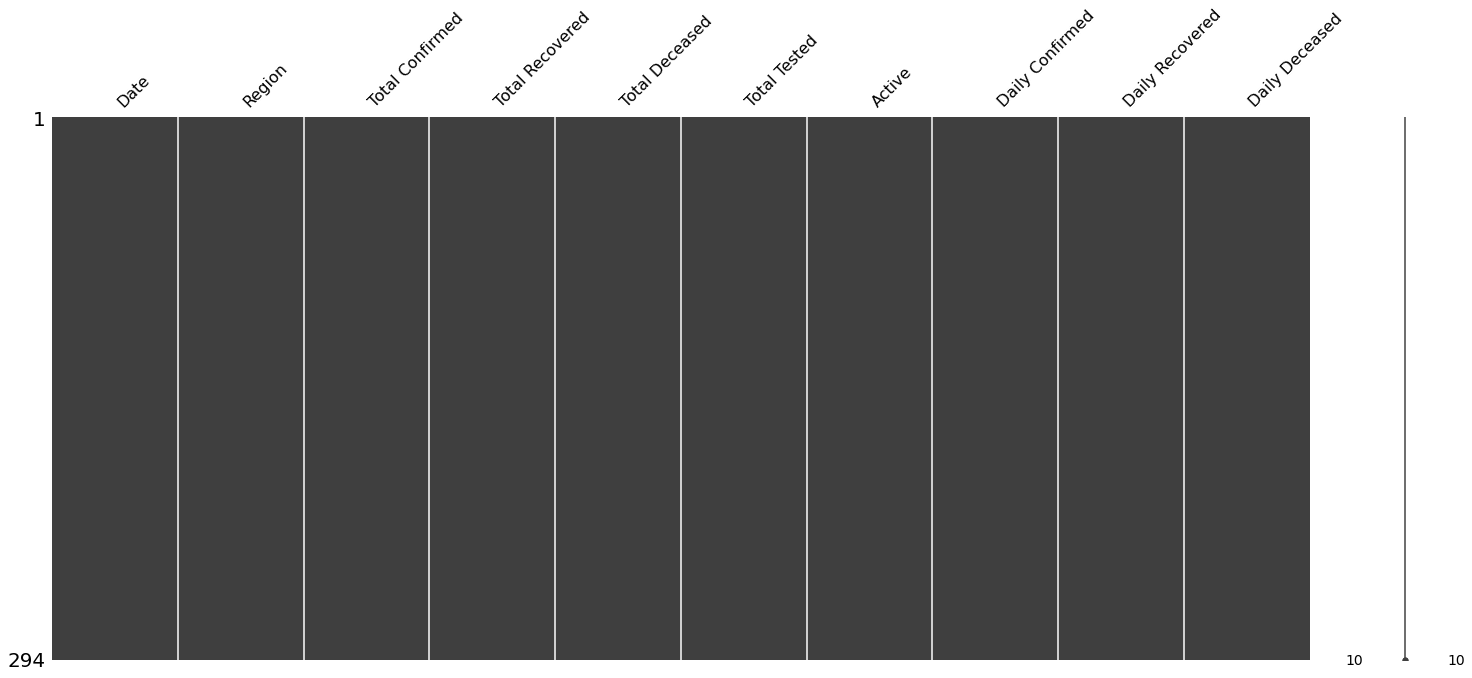

In [16]:
mns.matrix(ind_df);

In [17]:
# Try to convert float columns to int
ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 131 to 10451
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             294 non-null    object 
 1   Region           294 non-null    object 
 2   Total Confirmed  294 non-null    int64  
 3   Total Recovered  294 non-null    int64  
 4   Total Deceased   294 non-null    int64  
 5   Total Tested     294 non-null    float64
 6   Active           294 non-null    int64  
 7   Daily Confirmed  294 non-null    float64
 8   Daily Recovered  294 non-null    float64
 9   Daily Deceased   294 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 25.3+ KB


In [18]:
ind_df['Daily Confirmed'] = ind_df['Daily Confirmed'].astype('int64')

In [19]:
ind_df['Daily Recovered'] = ind_df['Daily Recovered'].astype('int64')

In [20]:
ind_df['Daily Deceased'] = ind_df['Daily Deceased'].astype('int64')

In [21]:
ind_df['Total Tested'] = ind_df['Total Tested'].astype('int64')

In [22]:
ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 131 to 10451
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             294 non-null    object
 1   Region           294 non-null    object
 2   Total Confirmed  294 non-null    int64 
 3   Total Recovered  294 non-null    int64 
 4   Total Deceased   294 non-null    int64 
 5   Total Tested     294 non-null    int64 
 6   Active           294 non-null    int64 
 7   Daily Confirmed  294 non-null    int64 
 8   Daily Recovered  294 non-null    int64 
 9   Daily Deceased   294 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 25.3+ KB


**Feature 3: Create a new column to store daily tests**

In [23]:
ind_df['Daily Tested'] = ind_df['Total Tested'] - ind_df['Total Tested'].shift(1)
ind_df['Daily Tested']

131            NaN
146            0.0
161            0.0
178            0.0
196            0.0
           ...    
10307     715397.0
10343     983695.0
10379    1120281.0
10415    1127244.0
10451    1062420.0
Name: Daily Tested, Length: 294, dtype: float64

In [24]:
# Check if there are '0' tests on any given day (this means that total tests for that day were the same as previous day)
no_tests = ind_df[ind_df['Daily Tested'] == 0]
no_tests

,Date,Region,Total Confirmed,Total Recovered,Total Deceased,Total Tested,Active,Daily Confirmed,Daily Recovered,Daily Deceased,Daily Tested
146,2020-03-14,India,102,3,1,6500,95,11,0,0,0.0
161,2020-03-15,India,112,3,1,6500,105,10,0,0,0.0
178,2020-03-16,India,126,3,1,6500,119,14,0,0,0.0
196,2020-03-17,India,146,3,1,6500,139,20,0,0,0.0
439,2020-03-27,India,883,8,3,27688,869,153,2,1,0.0
467,2020-03-28,India,1019,8,3,27688,1005,136,0,0,0.0
495,2020-03-29,India,1139,99,28,27688,1009,120,91,25,0.0
1222,2020-04-20,India,18544,3273,593,401586,14675,1239,419,33,0.0


In [25]:
ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 131 to 10451
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             294 non-null    object 
 1   Region           294 non-null    object 
 2   Total Confirmed  294 non-null    int64  
 3   Total Recovered  294 non-null    int64  
 4   Total Deceased   294 non-null    int64  
 5   Total Tested     294 non-null    int64  
 6   Active           294 non-null    int64  
 7   Daily Confirmed  294 non-null    int64  
 8   Daily Recovered  294 non-null    int64  
 9   Daily Deceased   294 non-null    int64  
 10  Daily Tested     293 non-null    float64
dtypes: float64(1), int64(8), object(2)
memory usage: 27.6+ KB


'0' daily tests basically means that the total tests were the same as the previous day. For example, tests done on two consecutive days would be the same - let's say 100000. In this case the increase or decrease in the number of daily tests is 0. If on the first day, the positivity rate is calculated, then perhaps we should use the same daily tests value to calculate positiviy rate for second day. We will come back to this later...

**Feature 4: Create a new column to store overall recovery rate**

In [26]:
ind_df['TRR'] = np.round((ind_df['Total Recovered'] / ind_df['Total Confirmed'] * 100), 2)
ind_df['TRR']

131       3.30
146       2.94
161       2.68
178       2.38
196       2.05
         ...  
10307    95.82
10343    95.91
10379    95.98
10415    96.03
10451    96.07
Name: TRR, Length: 294, dtype: float64

**Feature 5: Create a new column to store overall positivity rate**

In [27]:
ind_df['TPR'] = np.round((ind_df['Total Confirmed'] / ind_df['Total Tested'] * 100), 2)
ind_df['TPR']

131      1.40
146      1.57
161      1.72
178      1.94
196      2.25
         ... 
10307    6.05
10343    6.02
10379    5.99
10415    5.97
10451    5.94
Name: TPR, Length: 294, dtype: float64

**Feature 6: Create a new column to store overall case fatality rate**

In [28]:
ind_df['CFR'] = np.round((ind_df['Total Deceased'] / ind_df['Total Confirmed'] * 100), 2)
ind_df['CFR']

131      1.10
146      0.98
161      0.89
178      0.79
196      0.68
         ... 
10307    1.45
10343    1.45
10379    1.45
10415    1.45
10451    1.45
Name: CFR, Length: 294, dtype: float64

Convert the 'date' column to DateTime type

In [29]:
ind_df['Date'] = pd.to_datetime(ind_df['Date'])
ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 131 to 10451
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             294 non-null    datetime64[ns]
 1   Region           294 non-null    object        
 2   Total Confirmed  294 non-null    int64         
 3   Total Recovered  294 non-null    int64         
 4   Total Deceased   294 non-null    int64         
 5   Total Tested     294 non-null    int64         
 6   Active           294 non-null    int64         
 7   Daily Confirmed  294 non-null    int64         
 8   Daily Recovered  294 non-null    int64         
 9   Daily Deceased   294 non-null    int64         
 10  Daily Tested     293 non-null    float64       
 11  TRR              294 non-null    float64       
 12  TPR              294 non-null    float64       
 13  CFR              294 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int6

In [30]:
# Let's extract month, weekday and create new columns for them
ind_df['Month'] = pd.DatetimeIndex(ind_df.Date).month
ind_df['Weekday'] = pd.DatetimeIndex(ind_df.Date).weekday

# Check how the data set looks now
ind_df.head(10)

,Date,Region,Total Confirmed,Total Recovered,Total Deceased,Total Tested,Active,Daily Confirmed,Daily Recovered,Daily Deceased,Daily Tested,TRR,TPR,CFR,Month,Weekday
131,2020-03-13,India,91,3,1,6500,87,10,0,1,NaN,3.30,1.40,1.10,3,4
146,2020-03-14,India,102,3,1,6500,95,11,0,0,0.0,2.94,1.57,0.98,3,5
161,2020-03-15,India,112,3,1,6500,105,10,0,0,0.0,2.68,1.72,0.89,3,6
178,2020-03-16,India,126,3,1,6500,119,14,0,0,0.0,2.38,1.94,0.79,3,0
196,2020-03-17,India,146,3,1,6500,139,20,0,0,0.0,2.05,2.25,0.68,3,1
215,2020-03-18,India,171,3,1,13125,164,25,0,0,6625.0,1.75,1.30,0.58,3,2
237,2020-03-19,India,198,3,1,14175,191,27,0,0,1050.0,1.52,1.40,0.51,3,3
260,2020-03-20,India,256,4,1,15404,248,58,1,0,1229.0,1.56,1.66,0.39,3,4
283,2020-03-21,India,334,4,1,16911,326,78,0,0,1507.0,1.20,1.98,0.30,3,5
307,2020-03-22,India,403,4,1,18127,395,69,0,0,1216.0,0.99,2.22,0.25,3,6


In [31]:
ind_df = ind_df.dropna()
ind_df.head(10)

,Date,Region,Total Confirmed,Total Recovered,Total Deceased,Total Tested,Active,Daily Confirmed,Daily Recovered,Daily Deceased,Daily Tested,TRR,TPR,CFR,Month,Weekday
146,2020-03-14,India,102,3,1,6500,95,11,0,0,0.0,2.94,1.57,0.98,3,5
161,2020-03-15,India,112,3,1,6500,105,10,0,0,0.0,2.68,1.72,0.89,3,6
178,2020-03-16,India,126,3,1,6500,119,14,0,0,0.0,2.38,1.94,0.79,3,0
196,2020-03-17,India,146,3,1,6500,139,20,0,0,0.0,2.05,2.25,0.68,3,1
215,2020-03-18,India,171,3,1,13125,164,25,0,0,6625.0,1.75,1.30,0.58,3,2
237,2020-03-19,India,198,3,1,14175,191,27,0,0,1050.0,1.52,1.40,0.51,3,3
260,2020-03-20,India,256,4,1,15404,248,58,1,0,1229.0,1.56,1.66,0.39,3,4
283,2020-03-21,India,334,4,1,16911,326,78,0,0,1507.0,1.20,1.98,0.30,3,5
307,2020-03-22,India,403,4,1,18127,395,69,0,0,1216.0,0.99,2.22,0.25,3,6
331,2020-03-23,India,497,4,1,20707,489,94,0,0,2580.0,0.80,2.40,0.20,3,0


In [32]:
# Reset index for the data set
ind_df = ind_df.reset_index()
ind_df.head(10)

,index,Date,Region,Total Confirmed,Total Recovered,Total Deceased,Total Tested,Active,Daily Confirmed,Daily Recovered,Daily Deceased,Daily Tested,TRR,TPR,CFR,Month,Weekday
0,146,2020-03-14,India,102,3,1,6500,95,11,0,0,0.0,2.94,1.57,0.98,3,5
1,161,2020-03-15,India,112,3,1,6500,105,10,0,0,0.0,2.68,1.72,0.89,3,6
2,178,2020-03-16,India,126,3,1,6500,119,14,0,0,0.0,2.38,1.94,0.79,3,0
3,196,2020-03-17,India,146,3,1,6500,139,20,0,0,0.0,2.05,2.25,0.68,3,1
4,215,2020-03-18,India,171,3,1,13125,164,25,0,0,6625.0,1.75,1.30,0.58,3,2
5,237,2020-03-19,India,198,3,1,14175,191,27,0,0,1050.0,1.52,1.40,0.51,3,3
6,260,2020-03-20,India,256,4,1,15404,248,58,1,0,1229.0,1.56,1.66,0.39,3,4
7,283,2020-03-21,India,334,4,1,16911,326,78,0,0,1507.0,1.20,1.98,0.30,3,5
8,307,2020-03-22,India,403,4,1,18127,395,69,0,0,1216.0,0.99,2.22,0.25,3,6
9,331,2020-03-23,India,497,4,1,20707,489,94,0,0,2580.0,0.80,2.40,0.20,3,0


In [33]:
ind_df = ind_df.drop(['index'], axis = 1)
ind_df

,Date,Region,Total Confirmed,Total Recovered,Total Deceased,Total Tested,Active,Daily Confirmed,Daily Recovered,Daily Deceased,Daily Tested,TRR,TPR,CFR,Month,Weekday
0,2020-03-14,India,102,3,1,6500,95,11,0,0,0.0,2.94,1.57,0.98,3,5
1,2020-03-15,India,112,3,1,6500,105,10,0,0,0.0,2.68,1.72,0.89,3,6
2,2020-03-16,India,126,3,1,6500,119,14,0,0,0.0,2.38,1.94,0.79,3,0
3,2020-03-17,India,146,3,1,6500,139,20,0,0,0.0,2.05,2.25,0.68,3,1
4,2020-03-18,India,171,3,1,13125,164,25,0,0,6625.0,1.75,1.30,0.58,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,2020-12-27,India,10208725,9781945,147940,168818354,276028,20333,21097,281,715397.0,95.82,6.05,1.45,12,6
289,2020-12-28,India,10224797,9806767,148190,169802049,267015,16072,24822,250,983695.0,95.91,6.02,1.45,12,0
290,2020-12-29,India,10245339,9833356,148475,170922330,260671,20542,26589,285,1120281.0,95.98,5.99,1.45,12,1
291,2020-12-30,India,10267284,9859763,148774,172049574,255895,21945,26407,299,1127244.0,96.03,5.97,1.45,12,2


In [34]:
# Save this data frame as a csv for future purposes
#ind_df.to_csv('../Data/covid19indiaorg/India_Transformed.csv', index = False)

**To-Do:** Perhaps we should also have daily recovery rate, daily fatality rate and daily positivity rate

## 2. Visualizations

Visualizations:

1. daily confirmed, daily recovered, daily tested
2. total confirmed, total recovered, total tested
3. total recovery rate, total positivity rate, total fatality rate
4. daily recovery, daily fatality, daily positivity (if columns are created)

In [35]:
# Set date as the index
ind_df.set_index('Date', inplace = True)
ind_df

,Region,Total Confirmed,Total Recovered,Total Deceased,Total Tested,Active,Daily Confirmed,Daily Recovered,Daily Deceased,Daily Tested,TRR,TPR,CFR,Month,Weekday
Date,,,,,,,,,,,,,,,
2020-03-14,India,102,3,1,6500,95,11,0,0,0.0,2.94,1.57,0.98,3,5
2020-03-15,India,112,3,1,6500,105,10,0,0,0.0,2.68,1.72,0.89,3,6
2020-03-16,India,126,3,1,6500,119,14,0,0,0.0,2.38,1.94,0.79,3,0
2020-03-17,India,146,3,1,6500,139,20,0,0,0.0,2.05,2.25,0.68,3,1
2020-03-18,India,171,3,1,13125,164,25,0,0,6625.0,1.75,1.30,0.58,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,India,10208725,9781945,147940,168818354,276028,20333,21097,281,715397.0,95.82,6.05,1.45,12,6
2020-12-28,India,10224797,9806767,148190,169802049,267015,16072,24822,250,983695.0,95.91,6.02,1.45,12,0
2020-12-29,India,10245339,9833356,148475,170922330,260671,20542,26589,285,1120281.0,95.98,5.99,1.45,12,1


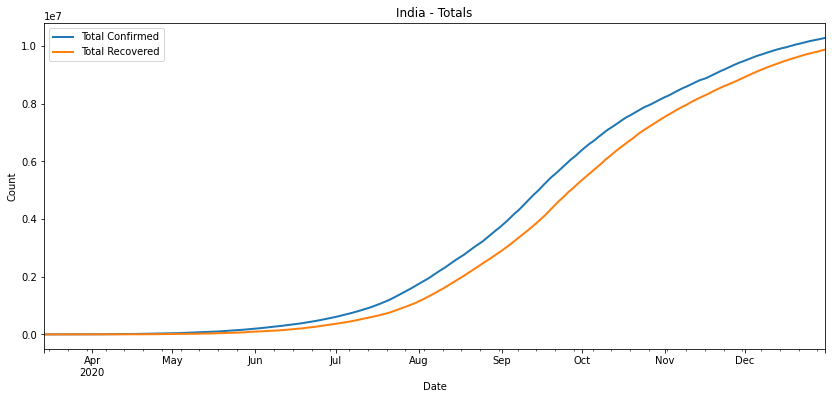

In [47]:
plt.figure(figsize=(14,6))
ind_df['Total Confirmed'].plot(ls='-', lw=2, legend=True)
ind_df['Total Recovered'].plot(ls='-', lw=2, legend=True)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('India - Totals');

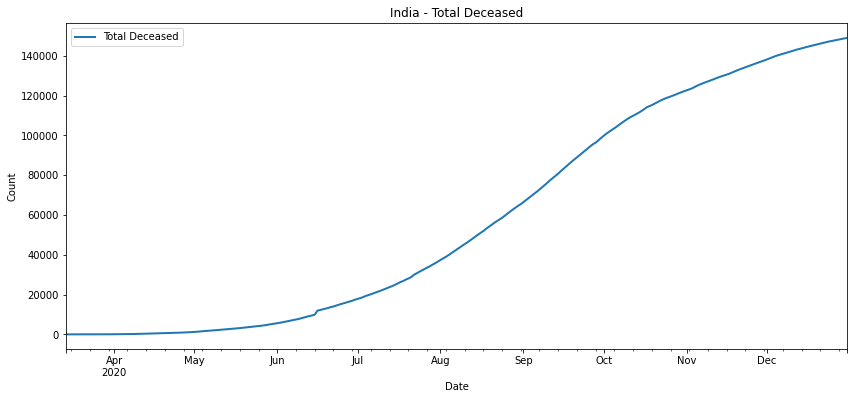

In [48]:
plt.figure(figsize=(14,6))
ind_df['Total Deceased'].plot(ls='-', lw=2, legend=True)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('India - Total Deceased');

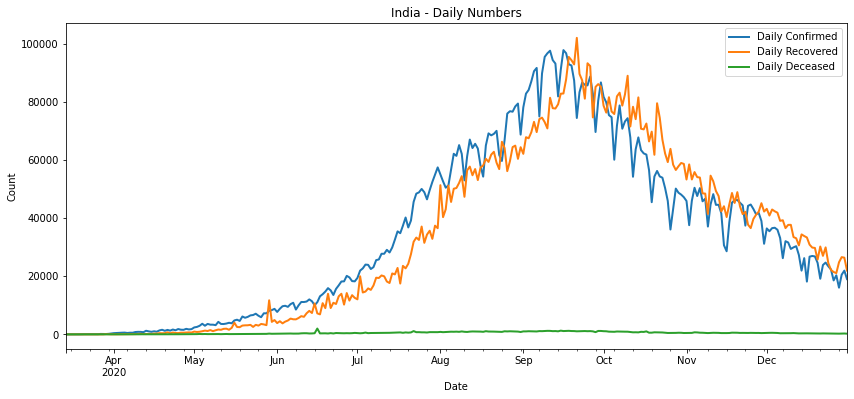

In [37]:
plt.figure(figsize=(14,6))
ind_df['Daily Confirmed'].plot(ls='-', lw=2, legend=True)
ind_df['Daily Recovered'].plot(ls='-', lw=2, legend=True)
ind_df['Daily Deceased'].plot(ls='-', lw=2, legend=True)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('India - Daily Numbers');

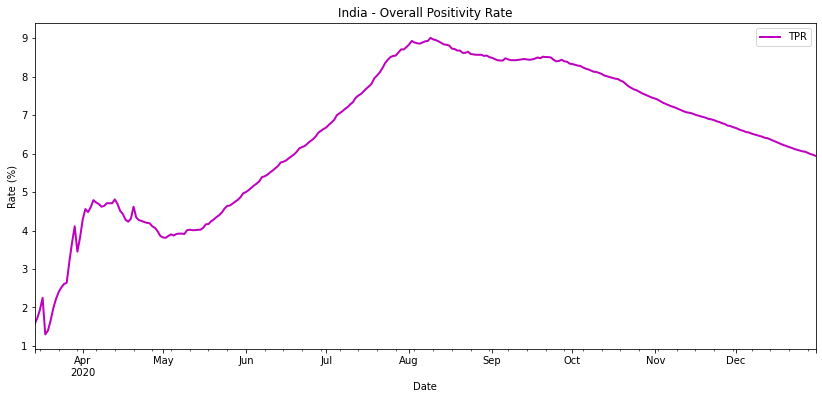

In [38]:
plt.figure(figsize=(14,6))
ind_df['TPR'].plot(ls='-', lw=2, c='m', legend=True)

plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title('India - Overall Positivity Rate');

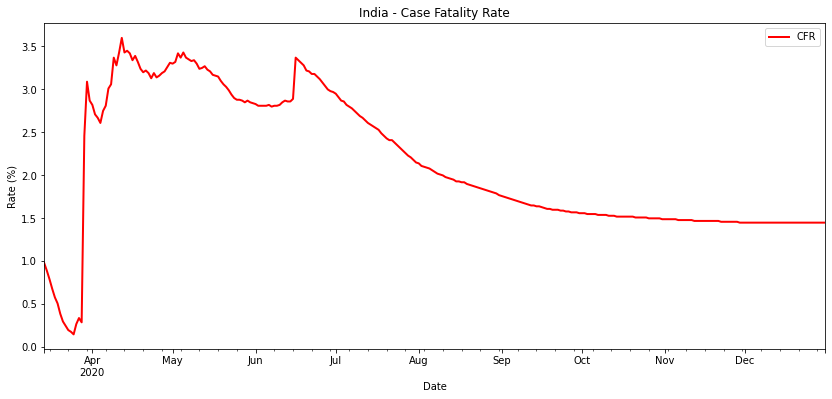

In [39]:
plt.figure(figsize=(14,6))
ind_df['CFR'].plot(ls='-', lw=2, c='r', legend=True)

plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title('India - Case Fatality Rate');

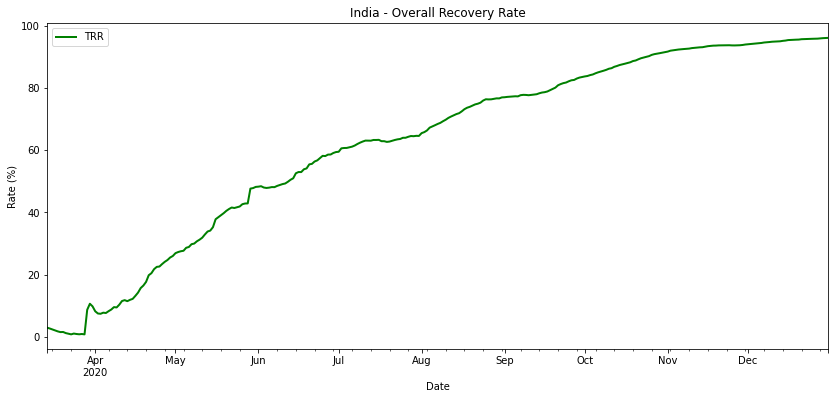

In [40]:
plt.figure(figsize=(14,6))
ind_df['TRR'].plot(ls='-', lw=2, c='g', legend=True)

plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title('India - Overall Recovery Rate');

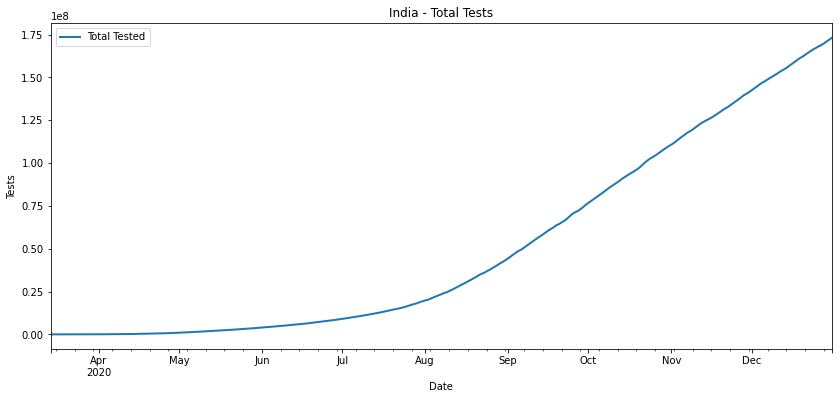

In [41]:
plt.figure(figsize=(14,6))
ind_df['Total Tested'].plot(ls='-', lw=2, legend=True)

plt.xlabel('Date')
plt.ylabel('Tests')
plt.title('India - Total Tests');

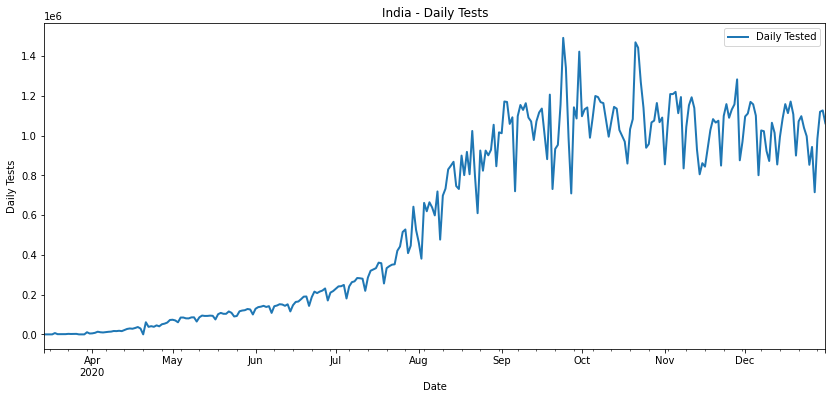

In [42]:
plt.figure(figsize=(14,6))
ind_df['Daily Tested'].plot(ls='-', lw=2, legend=True)

plt.xlabel('Date')
plt.ylabel('Daily Tests')
plt.title('India - Daily Tests');

In [43]:
# For Correlation heatmap, create a data frame without the weekday and month
corr_df = ind_df.drop(columns=['Weekday', 'Month'], axis = 1)

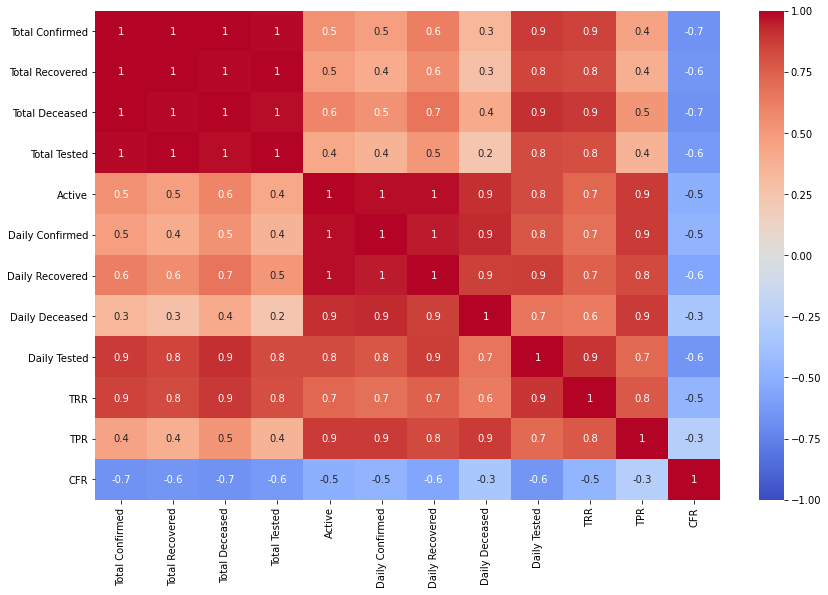

In [44]:
# Create correlation heatmap
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(corr_df.corr(), annot = True, fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm',
           linewidths = 0, linecolor = 'white', ax = ax);

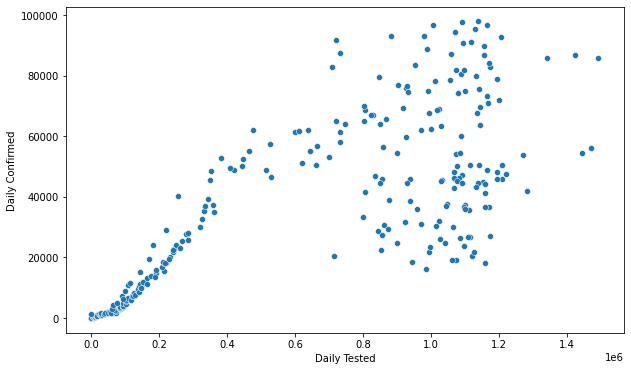

In [45]:
# Scatterplot for daily tested vs daily confirmed?
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = ind_df['Daily Tested'], y = ind_df['Daily Confirmed'], ax = ax);

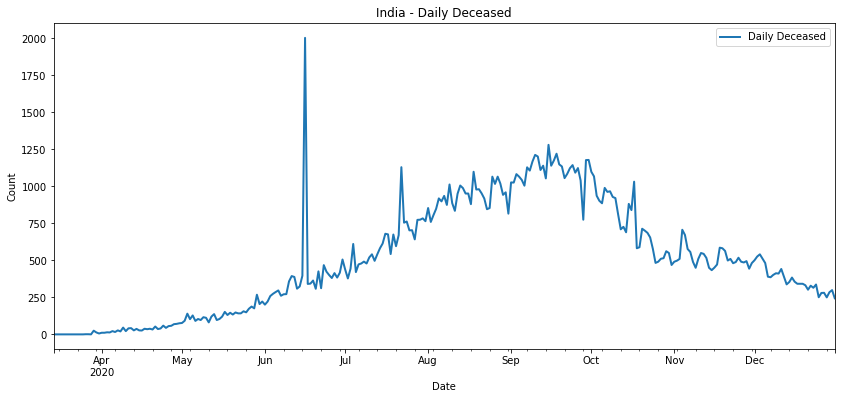

In [46]:
plt.figure(figsize=(14,6))
ind_df['Daily Deceased'].plot(ls='-', lw=2, legend=True)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('India - Daily Deceased');